# Testing for Stationarity (ADF Test)

[*********************100%***********************]  1 of 1 completed


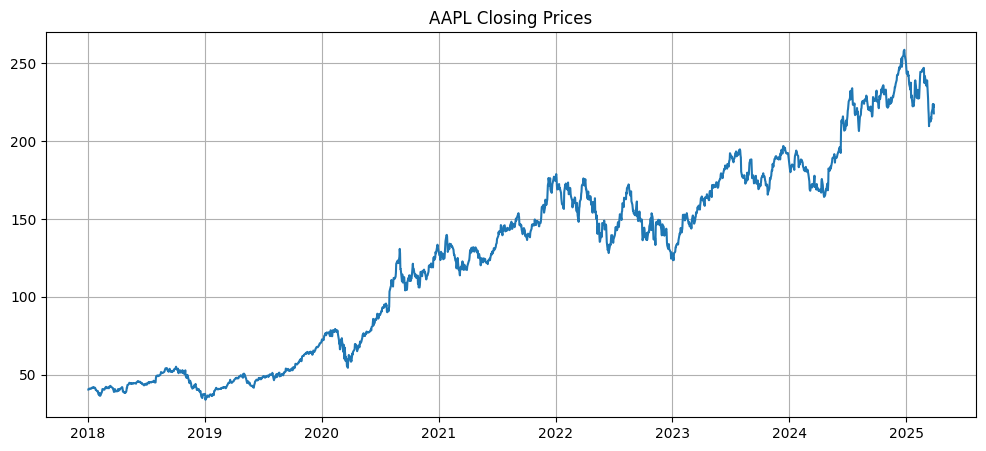

ADF Statistic: -0.7279125575446989
p-value: 0.8393864877936859


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data = yf.download('AAPL', start='2018-01-01', end='2025-12-31')['Close']

plt.figure(figsize=(12,5))
plt.plot(data)
plt.title("AAPL Closing Prices")
plt.grid(True)
plt.show()

adf_result = adfuller(data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


# Making a Series Stationary (Differencing)

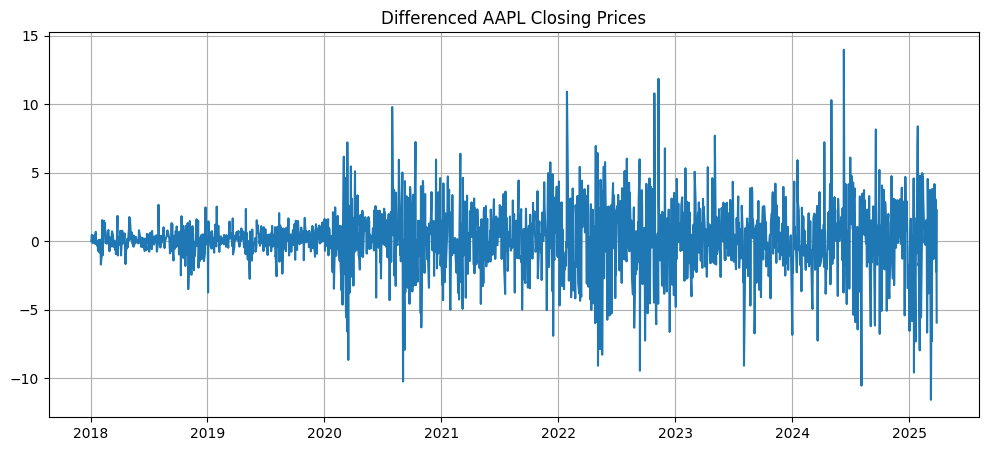

ADF Statistic (Differenced): -42.80399987621841
p-value (Differenced): 0.0


In [9]:
data_diff = data.diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(data_diff)
plt.title("Differenced AAPL Closing Prices")
plt.grid(True)
plt.show()

adf_result_diff = adfuller(data_diff)
print(f"ADF Statistic (Differenced): {adf_result_diff[0]}")
print(f"p-value (Differenced): {adf_result_diff[1]}")


# Decomposing Time Series into Components

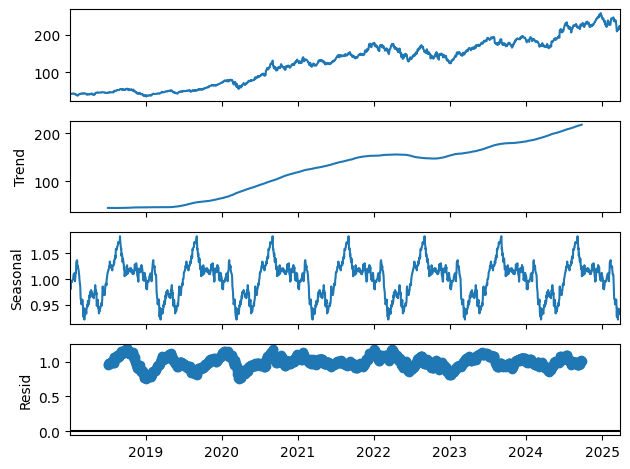

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='multiplicative', period=252)  # ~1 year of trading days
result.plot()
plt.tight_layout()
plt.show()


# Rolling Mean and Variance Diagnostics

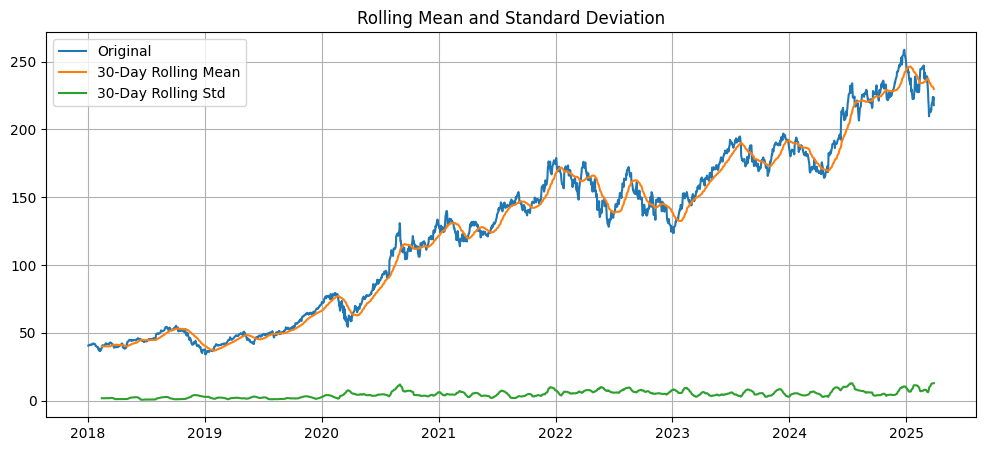

In [16]:
rolling_mean = data.rolling(window=30).mean()
rolling_std = data.rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(data, label='Original')
plt.plot(rolling_mean, label='30-Day Rolling Mean')
plt.plot(rolling_std, label='30-Day Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.grid(True)
plt.show()


# Log-Transformation & Volatility Stationarity

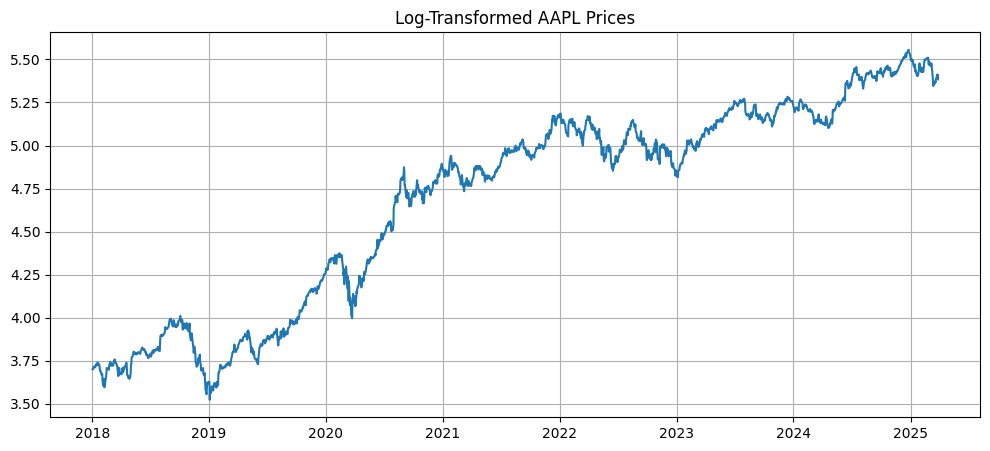

ADF Statistic (Log Prices): -1.1542511042685726
p-value (Log Prices): 0.6929598714702778


In [20]:
import numpy as np

# Log transformation of prices
log_data = np.log(data)

plt.figure(figsize=(12,5))
plt.plot(log_data)
plt.title("Log-Transformed AAPL Prices")
plt.grid(True)
plt.show()

# ADF Test on Log-Transformed Data
adf_result_log = adfuller(log_data.dropna())
print(f"ADF Statistic (Log Prices): {adf_result_log[0]}")
print(f"p-value (Log Prices): {adf_result_log[1]}")


# Volatility Stationarity Check (for GARCH models)

In [22]:
# Squared returns (proxy for volatility)
squared_returns = data_diff ** 2

# ADF Test on squared returns
adf_result_vol = adfuller(squared_returns.dropna())
print(f"ADF Statistic (Squared Returns): {adf_result_vol[0]}")
print(f"p-value (Squared Returns): {adf_result_vol[1]}")


ADF Statistic (Squared Returns): -4.152524757532139
p-value (Squared Returns): 0.0007920230031264666
